In [7]:
import json
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

FILENAME = '../outputs/eval/vary_k.json'
X_AXIS = 'k'

Getting the data from json file

In [8]:
with open(FILENAME, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Sort data by x axis
data = sorted(data, key=lambda d: d[X_AXIS])

# Map x values to space them evenly
x_map = {x: i for i, x in enumerate([d[X_AXIS] for d in data])}

# Collect the points
p_x, p_y, m_x, m_y = [], [], [], []
for d in data:
    x = x_map[d[X_AXIS]]
    for y in d["prim"]["rf_values"]:
        p_x.append(x)
        p_y.append(y)
    for y in d["maj"]["rf_values"]:
        m_x.append(x)
        m_y.append(y)

# Collect mean value for each x
p_mean = [mean(d["prim"]["rf_values"]) for d in data]
m_mean = [mean(d["maj"]["rf_values"]) for d in data]

Plotting the points

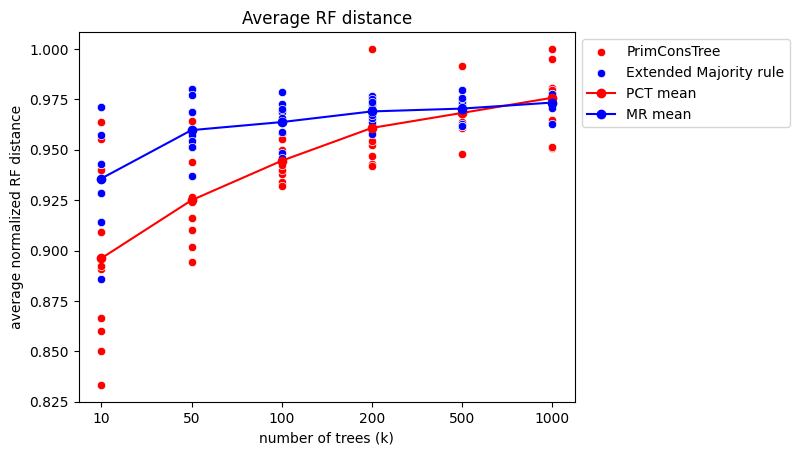

In [9]:
sns.scatterplot(x=p_x, y=p_y, color='red', label='PrimConsTree')
sns.scatterplot(x=m_x, y=m_y, color='blue', label='Extended Majority rule')
plt.plot(list(x_map.values()), p_mean, marker='o', linestyle='-',
         color='r', label='PCT mean')
plt.plot(list(x_map.values()), m_mean, marker='o', linestyle='-',
         color='b', label='MR mean')

plt.xticks(list(x_map.values()), list(x_map.keys()))

if X_AXIS == 'n':
    plt.xlabel('number of leaves (n)')
elif X_AXIS == 'k':
    plt.xlabel('number of trees (k)')
plt.ylabel('average normalized RF distance')
plt.title('Average RF distance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Plot execution time

In [10]:
with open(FILENAME, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Sort data by x axis
data = sorted(data, key=lambda d: d[X_AXIS])

# Map x values to space them evenly
x_map = {x: i for i, x in enumerate([d[X_AXIS] for d in data])}

# Collect the points
p_x, p_y, m_x, m_y = [], [], [], []
for d in data:
    x = x_map[d[X_AXIS]]
    for y in d["prim"]["durations"]:
        p_x.append(x)
        p_y.append(y)
    for y in d["maj"]["durations"]:
        m_x.append(x)
        m_y.append(y)

# Collect mean value for each x
p_mean = [mean(d["prim"]["durations"]) for d in data]
m_mean = [mean(d["maj"]["durations"]) for d in data]

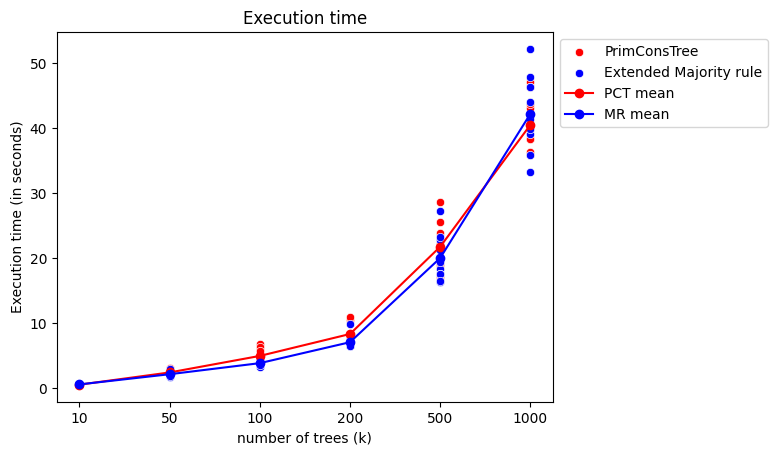

In [11]:
sns.scatterplot(x=p_x, y=p_y, color='red', label='PrimConsTree')
sns.scatterplot(x=m_x, y=m_y, color='blue', label='Extended Majority rule')
plt.plot(list(x_map.values()), p_mean, marker='o', linestyle='-',
         color='r', label='PCT mean')
plt.plot(list(x_map.values()), m_mean, marker='o', linestyle='-',
         color='b', label='MR mean')

plt.xticks(list(x_map.values()), list(x_map.keys()))

if X_AXIS == 'n':
    plt.xlabel('number of leaves (n)')
elif X_AXIS == 'k':
    plt.xlabel('number of trees (k)')
plt.ylabel('Execution time (in seconds)')
plt.title('Execution time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()